# Visualizing results obtained on Bikes project with random forest ML algorithm.
## Kaggle score is about 0.5



In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics

### First we read and visualize original data.
As we know most influential on final perdiction is column datetime. We will investigate how reasonable original data is and after we will compare it to the date predicted and submitted to Kaggle.

In [2]:
df = pd.read_csv('train.csv', parse_dates=['datetime'])
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,2,22


In [3]:
dfmonth=df.groupby('month').sum('count')
dfm=dfmonth['count']
dfday=df.groupby('weekday').sum('count')
dfd=dfday['count']
dfhour=df.groupby('hour').sum('count')
dfh=dfhour['count']


<AxesSubplot:xlabel='hour'>

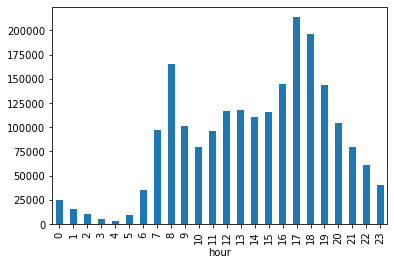

In [4]:
dfh.plot.bar()

<AxesSubplot:xlabel='weekday'>

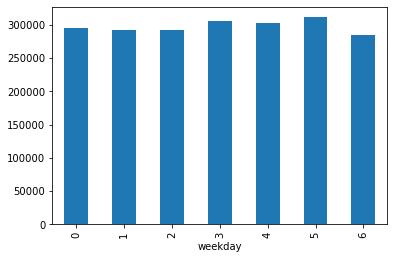

In [5]:
dfd.plot.bar()

<AxesSubplot:xlabel='month'>

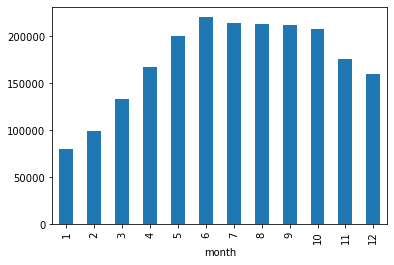

In [6]:
dfm.plot.bar()

### OK, demand dependance on month, day and hour seems to be reasonable.
Lets see how reasonable is the data predicted for Kaggle visualizing it and comparing it to the original data

In [7]:
dfF = pd.read_csv('Forest.csv', parse_dates=['datetime'])
dfF['month'] = dfF['datetime'].dt.month
dfF['weekday'] = dfF['datetime'].dt.weekday
dfF['hour'] = dfF['datetime'].dt.hour
dfF

,datetime,count,month,weekday,hour
0,2011-01-20 00:00:00,15.00,1,3,0
1,2011-01-20 01:00:00,5.40,1,3,1
2,2011-01-20 02:00:00,4.03,1,3,2
3,2011-01-20 03:00:00,3.92,1,3,3
4,2011-01-20 04:00:00,3.19,1,3,4
...,...,...,...,...,...
6488,2012-12-31 19:00:00,284.06,12,0,19
6489,2012-12-31 20:00:00,159.47,12,0,20
6490,2012-12-31 21:00:00,129.13,12,0,21
6491,2012-12-31 22:00:00,102.85,12,0,22


In [8]:
dfFmonth=dfF.groupby('month').sum('count')
dfFm=dfFmonth['count']
dfFday=dfF.groupby('weekday').sum('count')
dfFd=dfFday['count']
dfFhour=dfF.groupby('hour').sum('count')
dfFh=dfFhour['count']

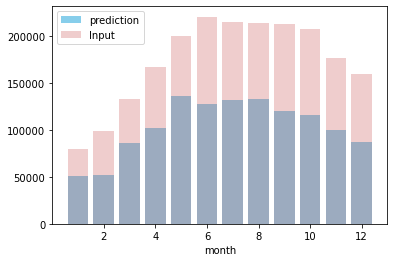

In [9]:
indyes = tuple(dfFm.index)
indno = tuple(dfm.index)
width = 5

p1 = plt.bar(indyes, dfFm, label="prediction", color='SkyBlue')
p2 = plt.bar(indno, dfm, label="Input", color='IndianRed',alpha=0.3)
plt.legend()
plt.xlabel('month')

plt.show()

### Not so good job for monthly prediction. The best month is supposed to be number 6 nad not 5. The month 6 is actually on the fourth place according to prediction. Still the general shape of the predicted distribution is not bad.

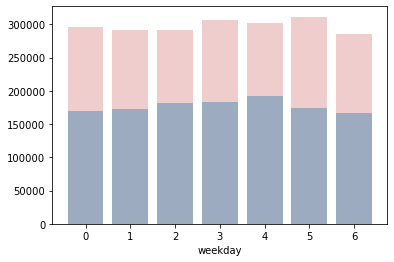

In [10]:
indyes = tuple(dfFd.index)
indno = tuple(dfd.index)
width = 5

p1 = plt.bar(indyes, dfFd, label="Input", color='SkyBlue')
p2 = plt.bar(indno, dfd, label="Output", color='IndianRed',alpha=0.3)
#plt.legend()
plt.xlabel('weekday')

plt.show()

### Weekday dependence prediction seems to be also not very accurate in a similar manner to monthly prediction even somewhat worse.

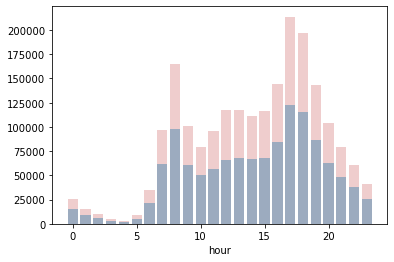

In [13]:
indyes = tuple(dfFh.index)
indno = tuple(dfh.index)
width = 5

p1 = plt.bar(indyes, dfFh, label="Input", color='SkyBlue')
p2 = plt.bar(indno, dfh, label="Output", color='IndianRed',alpha=0.3)
#plt.legend()
plt.xlabel('hour')

plt.show()

### In hourly distribution prediction we have excellent prediction accuracy!!!
Great, so now we know that in order to improve ourselves we should look better in month, weekday data. Maybe something is wrong with it. 